<a href="https://colab.research.google.com/github/raushan9jnv/ML--NYC-Taxi-Trip-Time-Prediction/blob/main/ML_Raushan_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ="/content/drive/MyDrive/Almabetter/Capstone project/Supervised learning/NYC Taxi Trip Prediction/Data & Resources/NYC Taxi Data.csv"

In [ ]:
df = pd.read_csv(path,index_col='id') #assign id as index

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.shape

(1458644, 10)

# Data Preprocessing

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.nunique()

vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


<b>Vendor_id, passenger_count, store_and_fwd_flag ---Categorical Variable
>>only two vendor providing service

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
 #convert datetime in string format to datetime object
 
 def convert_datetime(df):
   
   df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
   df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

   df.loc[:,'pickup_date']=df['pickup_datetime'].dt.date
   df.loc[:,'dropoff_date']=df['dropoff_datetime'].dt.date

   df.loc[:,'pickup_month']= df['pickup_datetime'].dt.month
   df.loc[:,'dropoff_month']= df['dropoff_datetime'].dt.month

   df.loc[:, 'pickup_weekday'] = df['pickup_datetime'].dt.weekday
   df.loc[:, 'drop_weekday'] = df['dropoff_datetime'].dt.weekday

   df.loc[:,'pickup_weekofyear']= df['pickup_datetime'].dt.isocalendar().week
   df.loc[:,'dropoff_weekofyear']= df['dropoff_datetime'].dt.isocalendar().week

   df.loc[:,'pickup_hour']= df['pickup_datetime'].dt.hour
   df.loc[:,'dropoff_hour']= df['dropoff_datetime'].dt.hour

   return df


In [ ]:
 convert_datetime(df).head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,pickup_month,dropoff_month,pickup_weekday,drop_weekday,pickup_weekofyear,dropoff_weekofyear,pickup_hour,dropoff_hour
id,,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016-03-14,3,3,0,0,11,11,17,17
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016-06-12,6,6,6,6,23,23,0,0
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2016-01-19,1,1,1,1,3,3,11,12
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2016-04-06,4,4,2,2,14,14,19,19
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2016-03-26,3,3,5,5,12,12,13,13


In [ ]:
 #checking pickup and drop weekday same are not?
(df['pickup_weekday']==df['drop_weekday']).sum() ==len([df['pickup_weekday']])

#if Yes then we don't need another dropoff column, if No then we keep it

False

In [ ]:
def time_of_day(hour):
  if hour in range(6,12):
    return 'Morning'
  elif hour in range(12,16):
    return 'Afternoon'
  elif hour in range(16,22):
    return 'Evening'
  else:
    return 'Late night'

In [ ]:
df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday'] = df['dropoff_hour'].apply(time_of_day)

In [ ]:
df.head()


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,pickup_month,dropoff_month,pickup_weekday,drop_weekday,pickup_weekofyear,dropoff_weekofyear,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
id,,,,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016-03-14,3,3,0,0,11,11,17,17,Evening,Evening
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016-06-12,6,6,6,6,23,23,0,0,Late night,Late night
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2016-01-19,1,1,1,1,3,3,11,12,Morning,Afternoon
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2016-04-06,4,4,2,2,14,14,19,19,Evening,Evening
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2016-03-26,3,3,5,5,12,12,13,13,Afternoon,Afternoon


In [ ]:
#calculate distance from geographical coordinates
from geopy.distance import great_circle

In [ ]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):

  start_coordinates= (pickup_lat,pickup_long)
  stop_coordinates= (dropoff_lat,dropoff_long)

  return great_circle(start_coordinates,stop_coordinates) 

In [ ]:
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [ ]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,pickup_month,dropoff_month,pickup_weekday,drop_weekday,pickup_weekofyear,dropoff_weekofyear,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
id,,,,,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016-03-14,3,3,0,0,11,11,17,17,Evening,Evening,1.4985228965327897 km
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016-06-12,6,6,6,6,23,23,0,0,Late night,Late night,1.8055097193484668 km
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2016-01-19,1,1,1,1,3,3,11,12,Morning,Afternoon,6.385107515168497 km
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2016-04-06,4,4,2,2,14,14,19,19,Evening,Evening,1.4855005212623669 km
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2016-03-26,3,3,5,5,12,12,13,13,Afternoon,Afternoon,1.1885901383944022 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,2016-04-08,4,4,4,4,14,14,13,13,Afternoon,Afternoon,1.2250818414251023 km
id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,2016-01-10,1,1,6,6,1,1,7,7,Morning,Morning,6.0498441256195346 km
id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,2016-04-22,4,4,4,4,16,16,6,7,Morning,Morning,7.824616828807736 km


# Data Visulization

## We add following column in our dataset
   <b>'pickup_date', 'dropoff_date', 'pickup_month',
       'dropoff_month', 'pickup_weekday', 'drop_weekday', 'pickup_weekofyear',
       'dropoff_weekofyear', 'pickup_hour', 'dropoff_hour', 'pickup_timeofday',
       'dropoff_timeofday', 'distance'

       column increase to 23 from 10
       13 columns added

In [ ]:
df.shape

(1458644, 23)

In [ ]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_date', 'dropoff_date', 'pickup_month', 'dropoff_month',
       'pickup_weekday', 'drop_weekday', 'pickup_weekofyear',
       'dropoff_weekofyear', 'pickup_hour', 'dropoff_hour', 'pickup_timeofday',
       'dropoff_timeofday', 'distance'],
      dtype='object')

In [ ]:
#Our new data
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,pickup_month,dropoff_month,pickup_weekday,drop_weekday,pickup_weekofyear,dropoff_weekofyear,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,distance
id,,,,,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016-03-14,3,3,0,0,11,11,17,17,Evening,Evening,1.4985228965327897 km
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016-06-12,6,6,6,6,23,23,0,0,Late night,Late night,1.8055097193484668 km
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2016-01-19,1,1,1,1,3,3,11,12,Morning,Afternoon,6.385107515168497 km
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2016-04-06,4,4,2,2,14,14,19,19,Evening,Evening,1.4855005212623669 km
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2016-03-26,3,3,5,5,12,12,13,13,Afternoon,Afternoon,1.1885901383944022 km


In [ ]:
df.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_date                   object
dropoff_date                  object
pickup_month                   int64
dropoff_month                  int64
pickup_weekday                 int64
drop_weekday                   int64
pickup_weekofyear             UInt32
dropoff_weekofyear            UInt32
pickup_hour                    int64
dropoff_hour                   int64
pickup_timeofday              object
dropoff_timeofday             object
distance                      object
dtype: object

In [ ]:
df['distance'].dtypes

dtype('O')

TypeError: ignored

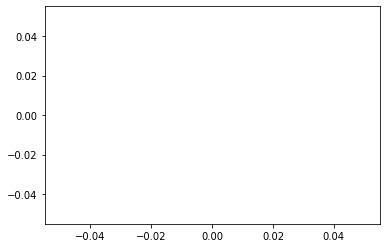

In [ ]:
 sns.scatterplot(x='trip_duration',y='distance',hue='vendor_id',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


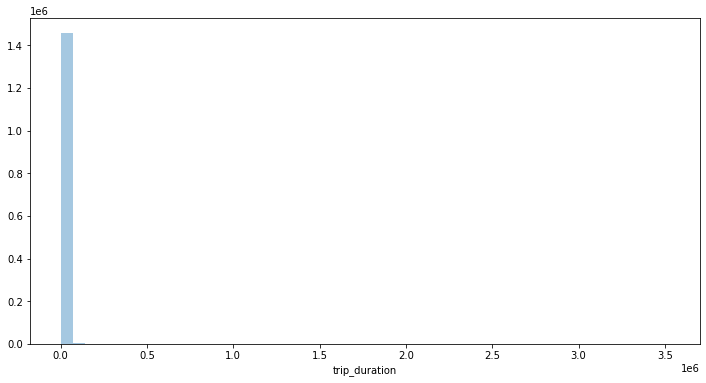

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['trip_duration'],kde=False)

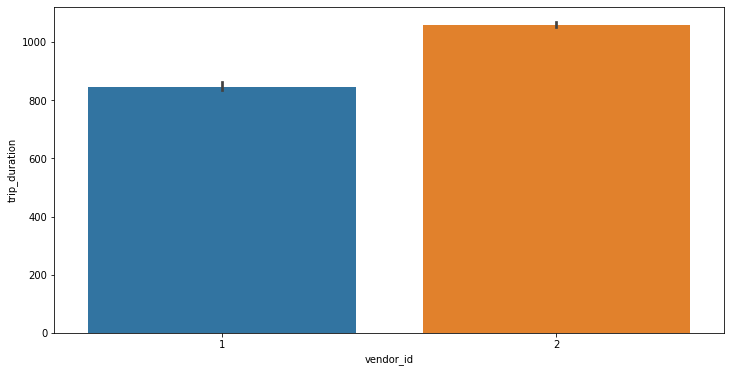

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['vendor_id'],y=df['trip_duration'])